In [2]:
# Calculating the approximation ratio by comparing the approximation algorithm to the greedy, specified on a networkx approximation algorithm for cliques.
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd

In [3]:
# Function which generates a random number n and a random number between 0 and 1 p, and returns a random graph with n nodes and probability p
def random_graph(n, p):
    return nx.gnp_random_graph(n, p)

In [4]:
# Function which uses the greedy algorithm to return the maximum clique of a graph
def greedy(graph):
    cliques = nx.find_cliques(graph)
    max_clique = 0
    for clique in cliques:
        if len(clique) > max_clique:
            max_clique = len(clique)
    return max_clique

In [5]:
# Function which uses the approximation algorithm to return the maximum clique of a graph
def approx(graph):
    return nx.algorithms.approximation.clique.max_clique(graph)

In [6]:
# Function which returns the approximation ratio of the approximation algorithm to the greedy algorithm
def approx_ratio(graph):
    return len(approx(graph))/greedy(graph)

In [7]:
# Function which receives a list of values of n, and a list of approximation ratio of the approximation algorithm to the greedy algorithm and draws a graph of the approximation ratio as a function of n
def draw_a_graph_of_approx_ratio_as_a_function_of_n(n_list, ratio):
    plt.plot(n_list, ratio)
    plt.xlabel('n')
    plt.ylabel('approximation ratio')
    plt.show()

In [8]:
# Function which returns the average approximation ratio of the approximation algorithm to the greedy algorithm for a range of values of n and p
def check():
    for index in range(1,11):
        n_list = []
        p_list = []
        ratio = []
        p = rnd.uniform(0.1*(index-1), 0.1*index)
        for n in range(1, 59):
            n_list.append(n)
            graph = random_graph(n, p)
            p_list.append(p)
            ratio.append(approx_ratio(graph))
        print("p =", p)
        draw_a_graph_of_approx_ratio_as_a_function_of_n(n_list, ratio)

p = 0.09066953449337684


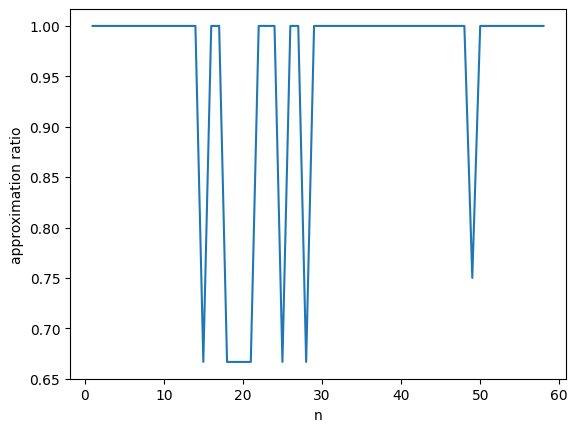

p = 0.16798143032280616


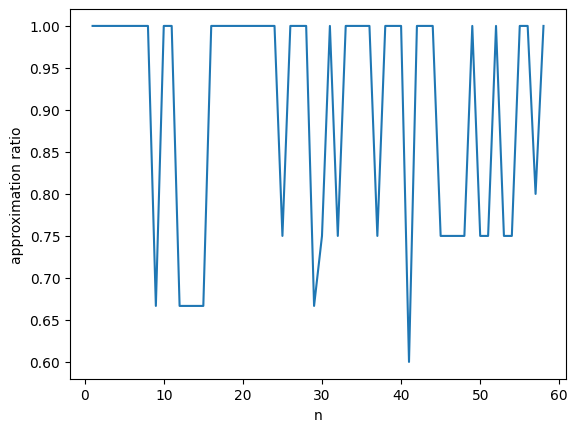

p = 0.28408984419443717


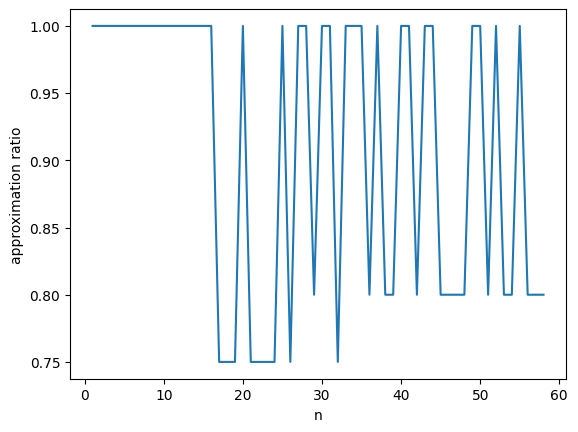

p = 0.3693790208034077


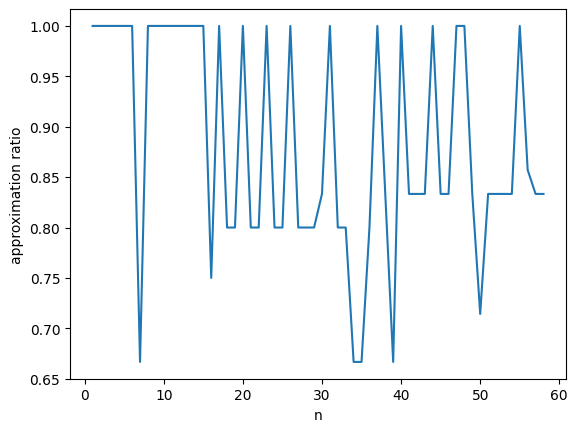

p = 0.485382226872756


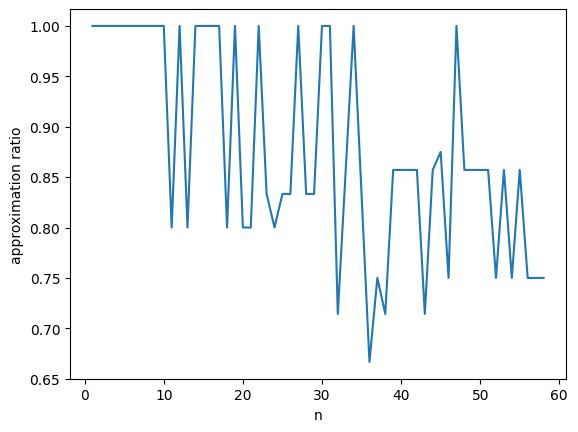

p = 0.5504102914002855


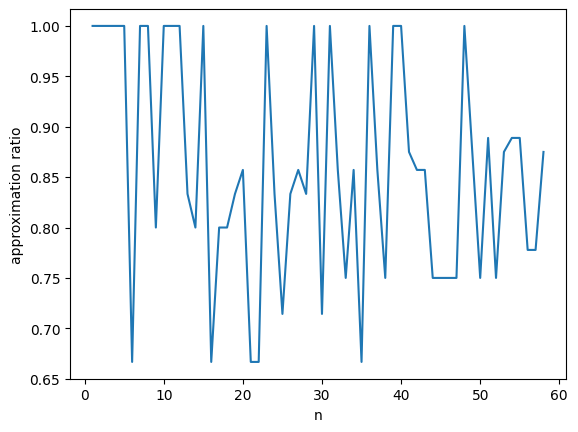

p = 0.6135663070010425


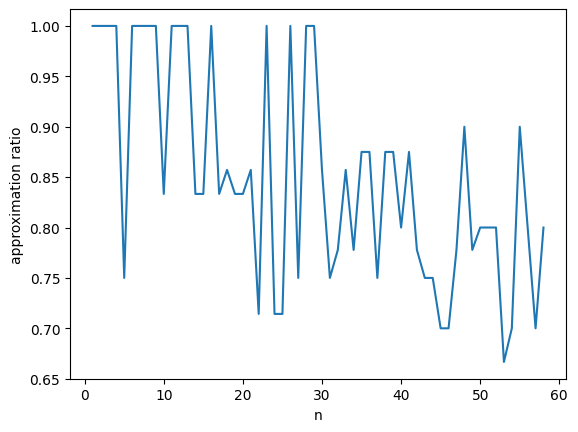

p = 0.7404789952061325


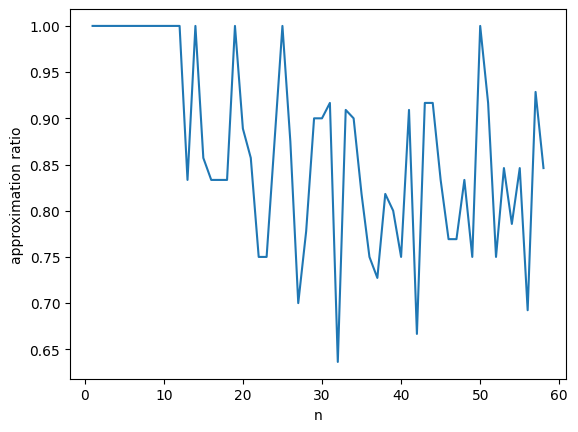

p = 0.8733501600935238


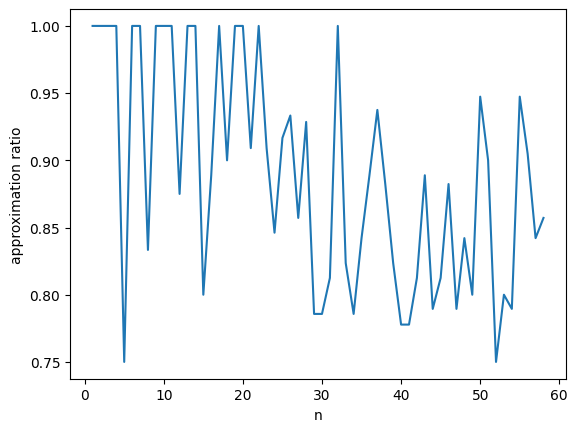

p = 0.9798718188287764


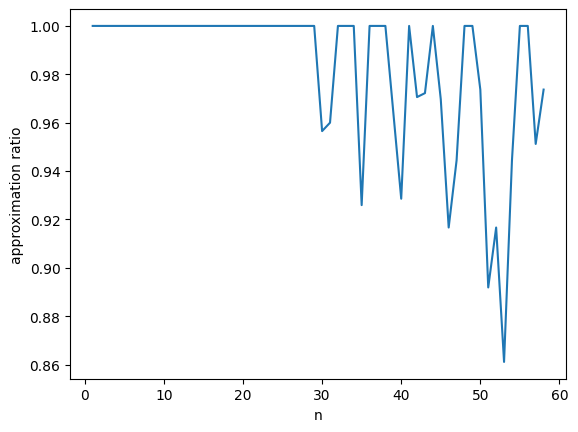

In [9]:
check()